# Логистическая регрессия

In [122]:
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import make_pipeline 
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.model_selection import train_test_split

# Проводим подготовку данных.
df = pd.read_csv("data.csv")

# Входные значения признаков.
features = df.drop("class", axis=1)
features = pd.get_dummies(features)

# Целевые значения.
target = df["class"]
target = target.replace({'Negative': 0, 'Positive': 1})

In [123]:
print(features)

     Age  Gender_Female  Gender_Male  Polyuria_No  Polyuria_Yes  \
0     40          False         True         True         False   
1     58          False         True         True         False   
2     41          False         True        False          True   
3     45          False         True         True         False   
4     60          False         True        False          True   
..   ...            ...          ...          ...           ...   
515   39           True        False        False          True   
516   48           True        False        False          True   
517   58           True        False        False          True   
518   32           True        False         True         False   
519   42          False         True         True         False   

     Polydipsia_No  Polydipsia_Yes  sudden weight loss_No  \
0            False            True                   True   
1             True           False                   True   
2           

In [124]:
print(target)

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [125]:
logit = LogisticRegression(solver="liblinear")
logit.fit(features, target)

print("Модель:", logit.coef_)

Модель: [[-0.02392891  1.85261777 -1.30130705 -1.31408256  1.86539328 -1.43829482
   1.98960554  0.05137658  0.49993415 -0.01121436  0.56252509 -0.10883327
   0.66014399 -0.37600199  0.92731272 -0.00559319  0.55690391  1.13756892
  -0.5862582  -0.58358934  1.13490007  0.51167921  0.03963151 -0.1882405
   0.73955122  0.51611747  0.03519326  0.34925763  0.2020531   0.37636188
   0.17494884]]


## Перекрестная проверка

In [126]:
# Кросс-валидация.
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cv_results = cross_val_score(logit, # Модель
    features_standardized, # Матрица признаков
    target, # Вектор целей
    cv=kf, # Метод перекрестной проверки
    scoring="accuracy", # Функция потери
    n_jobs=-1
) 

for index, value in enumerate(cv_results):
    print(f"Итерация {index + 1}: {value}")

cv_results_mean = cv_results.mean()
print(f"Среднее значение перекрестной проверки: {cv_results_mean}")

Итерация 1: 0.9230769230769231
Итерация 2: 0.9615384615384616
Итерация 3: 0.9230769230769231
Итерация 4: 0.9615384615384616
Итерация 5: 0.9230769230769231
Итерация 6: 0.9423076923076923
Итерация 7: 0.8846153846153846
Итерация 8: 0.9423076923076923
Итерация 9: 0.8846153846153846
Итерация 10: 0.8653846153846154
Среднее значение перекрестной проверки: 0.9211538461538462


## ROC-кривая

0.98003125


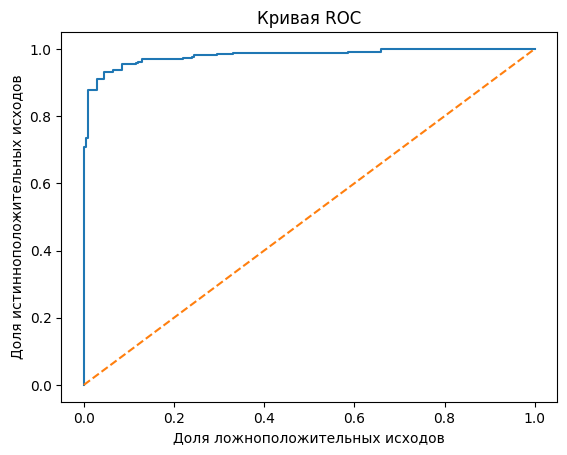

In [128]:
target_probabilities = logit.predict_proba(features)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(target, target_probabilities)
auc = roc_auc_score(target, target_probabilities)

print(auc)

plt.title("Кривая ROC")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.xlabel("Доля ложноположительных исходов")
plt.ylabel("Доля истинноположительных исходов")  
plt.show()